In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias/

/content/drive/.shortcut-targets-by-id/1G9SUNVbWwaSSHKmsm4W1sQGap8KDKgHv/xAI for Social Bias


In [4]:
%cd Sklearn\ Models/

/content/drive/.shortcut-targets-by-id/1G9SUNVbWwaSSHKmsm4W1sQGap8KDKgHv/xAI for Social Bias/Sklearn Models


In [5]:
import pandas as pd
import numpy as np
twitter=pd.read_csv('Twitter_Data.csv')
twitter.isna().sum()

clean_text    4
category      7
dtype: int64

In [6]:
twitter.dropna(axis=0, inplace=True)

In [7]:
df = twitter
df['category'] = df['category'].map({-1.0:'Negative', 0.0:'Neutral', 1.0:'Positive'})
df

clean_text  category
0       when modi promised “minimum government maximum...  Negative
1       talk all the nonsense and continue all the dra...   Neutral
2       what did just say vote for modi  welcome bjp t...  Positive
3       asking his supporters prefix chowkidar their n...  Positive
4       answer who among these the most powerful world...  Positive
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...  Negative
162976  dear rss terrorist payal gawar what about modi...  Negative
162977  did you cover her interaction forum where she ...   Neutral
162978  there big project came into india modi dream p...   Neutral
162979  have you ever listen about like gurukul where ...  Positive

[162969 rows x 2 columns]

In [8]:
df['category'] = df['category'].map({'Negative':0.0, 'Neutral':1.0, 'Positive':2.0})
df

clean_text  category
0       when modi promised “minimum government maximum...       0.0
1       talk all the nonsense and continue all the dra...       1.0
2       what did just say vote for modi  welcome bjp t...       2.0
3       asking his supporters prefix chowkidar their n...       2.0
4       answer who among these the most powerful world...       2.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...       0.0
162976  dear rss terrorist payal gawar what about modi...       0.0
162977  did you cover her interaction forum where she ...       1.0
162978  there big project came into india modi dream p...       1.0
162979  have you ever listen about like gurukul where ...       2.0

[162969 rows x 2 columns]

In [9]:
train=[]
train=list(df['clean_text'])
labels=[]
labels=list(df['category'])

In [10]:
from string import punctuation
punctuation+="“"
punctuation+="”"
# print(punctuation)

# print(punctuation)
print(train[0])
all_text=""
# get rid of punctuation
for i in range(len(train)):
  train[i]=str(train[i]).lower()
  train[i]=''.join([c for c in train[i] if c not in punctuation])
  all_text+=train[i]+" "

when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples


In [11]:
print(train[0])


when modi promised minimum government maximum governance expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples


In [12]:
sum(1 for number in labels if number < 0)

0

In [13]:
#Bag Of Words Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer="word")
cv_train = vectorizer.fit_transform(train)

In [14]:
#TFIDF Feature Extraction
from sklearn.feature_extraction.text import TfidfTransformer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Create a Vectorizer Object using default parameters
hash_vectorizer = HashingVectorizer(alternate_sign=False)

# Convert a collection of text documents to a matrix of token counts
token_count_matrix=hash_vectorizer.fit_transform(train)
print(f'The size of the count matrix for the texts = {token_count_matrix.get_shape()}')
print(f'The sparse count matrix is as follows:')
print(token_count_matrix)

# Create a tf_idf object using default parameters
tf_idf_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 

# Fit to the count matrix, then transform it to a normalized tf-idf representation
tf_idf_matrix = tf_idf_transformer.fit_transform(token_count_matrix)

print(f'The size of the tf_idf matrix for the texts = {tf_idf_matrix.get_shape()}')
print(f'The sparse tf_idf matrix is as follows:')
print(tf_idf_matrix)

The size of the count matrix for the texts = (162969, 1048576)
The sparse count matrix is as follows:
  (0, 160541)	0.14907119849998599
  (0, 168557)	0.14907119849998599
  (0, 180525)	0.4472135954999579
  (0, 232512)	0.14907119849998599
  (0, 263274)	0.14907119849998599
  (0, 277794)	0.14907119849998599
  (0, 286878)	0.29814239699997197
  (0, 288398)	0.14907119849998599
  (0, 360502)	0.29814239699997197
  (0, 387101)	0.14907119849998599
  (0, 433698)	0.14907119849998599
  (0, 434864)	0.14907119849998599
  (0, 449993)	0.14907119849998599
  (0, 465141)	0.14907119849998599
  (0, 482215)	0.14907119849998599
  (0, 484920)	0.14907119849998599
  (0, 490370)	0.29814239699997197
  (0, 522187)	0.14907119849998599
  (0, 614924)	0.14907119849998599
  (0, 646934)	0.14907119849998599
  (0, 747378)	0.14907119849998599
  (0, 748718)	0.14907119849998599
  (0, 808196)	0.14907119849998599
  (0, 839641)	0.14907119849998599
  (0, 865698)	0.14907119849998599
  :	:
  (162968, 257965)	0.16222142113076254
  (1

In [15]:
#Splitting the data into training and testing(For TFIDF)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, labels,
                                                    test_size=0.2)

In [16]:
#Splitting the data into training and testing(For BOW)
from sklearn.model_selection import train_test_split

cvX_train, cvX_test, cvy_train, cvy_test = train_test_split(cv_train, labels,
                                                    test_size=0.2)

# MODELS
- Linear SVM
- Linear SVM with SGD(Stochastic Gradient Descent)
- Naive Bayes
- Logistic regression

## SVM(without SGD)

### TF-IDF

In [17]:
import torch

from sklearn.svm import LinearSVC
#Creating, fitting and scoring classifier
classifier = LinearSVC()
classifier.fit(X_train, y_train)
print(f"TF-IDF Accuracy: {classifier.score(X_test, y_test) * 100:.3f}%", )

TF-IDF Accuracy: 94.238%


In [18]:
import pickle
Filename = "Linear_SVM_TFIDF.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(classifier, file)

### BOW

In [19]:
from sklearn.svm import LinearSVC
#Creating, fitting and scoring classifier
classifier_bow = LinearSVC(max_iter=10000, dual=True)
classifier_bow.fit(cvX_train, cvy_train)
print(f"BOW Accuracy: {classifier_bow.score(cvX_test, cvy_test) * 100:.3f}%", )

BOW Accuracy: 94.631%


In [20]:
import pickle
Filename = "Linear_SVM_BOW.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(classifier_bow, file)

## SVM with Stochastic Gradient descent

### TF-IDF

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression,SGDClassifier

#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for tfidf features
svm_tfidf=svm.fit(X_train,y_train)
print(svm_tfidf)

#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(X_test)
print(svm_tfidf_predict)

#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(y_test,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[1. 2. 1. ... 2. 2. 2.]
svm_tfidf_score : 0.8542062956372338


### BOW

In [22]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#fitting the svm for bag of words
svm_bow=svm.fit(cvX_train,cvy_train)
print(svm_bow)

#Predicting the model for bag of words
svm_bow_predict=svm.predict(cvX_test)
print(svm_bow_predict)

#Accuracy score for bag of words
svm_bow_score=accuracy_score(cvy_test,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
[2. 2. 1. ... 1. 2. 1.]
svm_bow_score : 0.9389764987420998


In [23]:
import pickle
Filename = "SVM_SGD.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(svm, file)

## Naive Bayes

### BOW

In [24]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb_bow=mnb.fit(X_train,y_train)
print(mnb_bow)
mnb_tfidf_predict=mnb.predict(X_test)
print(mnb_tfidf_predict)
mnb_tfidf_score=accuracy_score(y_test ,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
[2. 2. 2. ... 2. 2. 2.]
mnb_tfidf_score : 0.46876725777750505


### TF-IDF

In [25]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb_bow=mnb.fit(cvX_train,cvy_train)
print(mnb_bow)
mnb_bow_predict=mnb.predict(cvX_test)
print(mnb_bow_predict)
mnb_bow_score=accuracy_score(cvy_test ,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
[0. 2. 1. ... 1. 2. 1.]
mnb_bow_score : 0.7456587101920599


In [26]:
import pickle
Filename = "NB.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(mnb, file)

## Logistic regression

### TF-IDF

In [27]:
#training the model
lr=LogisticRegression(penalty='l2',solver='lbfgs', max_iter=600,C=1,random_state=42)
# Fitting the model for tfidf features
lr_tfidf=lr.fit(X_train,y_train)
print(lr_tfidf)

lr_tfidf_predict=lr.predict(X_test)
print(lr_tfidf_predict)

lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_bow_score :",lr_tfidf_score)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[1. 2. 1. ... 2. 2. 2.]
lr_bow_score : 0.9190341780695833


### BOW

In [28]:
#training the model
lr=LogisticRegression(penalty='l2',solver='lbfgs', max_iter=600,C=1,random_state=42)
# Fitting the model for bow features
lr_bow=lr.fit(cvX_train,cvy_train)
print(lr_bow)

lr_bow_predict=lr.predict(cvX_test)
print(lr_bow_predict)

lr_bow_score=accuracy_score(cvy_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[2. 2. 1. ... 1. 2. 1.]
lr_bow_score : 0.944621709517089


In [29]:
import pickle
Filename = "Logistic_Regression.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(lr, file)

# Explanations

In [30]:
!pip install lime
!pip install transformers

     |████████████████████████████████| 275 kB 29.3 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=32daa41c31f849eb8644884c030af2f8e098808ca2d9c0300f93c68d0c075e8f
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 2.6 MB 38.7 MB/s 
     |████████████████████████████████| 895 kB 49.6 MB/s 
     |████████████████████████████████| 3.3 MB 42.2 MB/s 
     |████████████████████████████████| 636 kB 44.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [31]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

## BOW Pipelines

In [32]:
from sklearn.pipeline import make_pipeline

lr_bow_pipe = make_pipeline(vectorizer, lr)
svc_bow_pipe = make_pipeline(vectorizer, classifier_bow)
svm_bow_pipe = make_pipeline(vectorizer, svm)
mnb_bow_pipe = make_pipeline(vectorizer, mnb)

In [33]:
import pickle
Filename = "Logistic_Regression_pipeline.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(lr_bow_pipe, file)

In [35]:
import pickle
Filename = "Linear_SVC_pipeline.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(svc_bow_pipe, file)

In [37]:
import pickle
Filename = "SVM_pipeline.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(svm_bow_pipe, file)

In [36]:
import pickle
Filename = "mnb_pipeline.pkl"  
with open(Filename, 'wb') as file:  
    pickle.dump(mnb_bow_pipe, file)

In [ ]:
from string import punctuation

def tokenize_(test):
    #print(test)
    test= test.lower() # lowercase
    # get rid of punctuation
    txt = ''.join([c for c in test if c not in punctuation])

    return txt

sample = 'This is the worst movie I have seen, and the acting was terrible.'
output_ints = tokenize_(sample)
print(output_ints)

def predict(test_, model, sequence_length=200):
    # tokenize review
    op = tokenize_(test_)
    
    # get the output from the model
    output = model.predict_proba([op])
    # print(type(output))
    
    # convert output probabilities to predicted class (0 or 1)
    pred = np.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding:', output)
    
    # print custom response
    pred_=np.argmax(output)
    if(pred_==0):
      print("It is a negative review")
    if(pred_==1):
      print("It is a neutral review")
    if(pred_==2):
      print("It is a positive review")
    return pred

this is the worst movie i have seen and the acting was terrible


In [ ]:
sample = 'This is the worst movie I have seen, and the acting was terrible.'
k = predict(sample, mnb_bow_pipe)
k

It is a negative review


array([1., 0., 0.])

In [ ]:
svc_bow_pipe.decision_function(['he is terrible'])

array([[ 2.30348206, -1.06879653, -3.633437  ]])

In [ ]:
def predict_SVC(test_, model, sequence_length=200):
    # tokenize review
    op = tokenize_(test_)
    
    # get the output from the model
    output = model.decision_function([op])
    print(output)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = np.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding:', output)
    
    # print custom response
    pred_=np.argmax(output)
    if(pred_==0):
      print("It is a negative review")
    if(pred_==1):
      print("It is a neutral review")
    if(pred_==2):
      print("It is a positive review")
    return pred

In [ ]:
sample = 'This is the worst movie I have seen, and the acting was terrible.'
k = predict_SVC(sample, svc_bow_pipe)
k

[[ 6.018354   -2.4989853  -8.05374948]]
It is a negative review


array([ 6., -2., -8.])

In [ ]:
sample = 'This is the worst movie I have seen, and the acting was terrible.'
k = predict_SVC(sample, svm_bow_pipe)
k

[[ 3.8587652  -2.26214471 -5.29686989]]
It is a negative review


array([ 4., -2., -5.])

In [ ]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
exp = explainer.explain_instance(tokenize_(sentences[1]), lr_bow_pipe.predict_proba, top_labels=3, num_features=10, num_samples=100)
predict_SVC(sentences[1], lr_bow_pipe)
exp.show_in_notebook(text=True, predict_proba=False)

[[-1.43937518  2.90110737 -1.46173219]]
It is a neutral review


In [ ]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
exp = explainer.explain_instance(tokenize_(sentences[0]), svc_bow_pipe.decision_function, top_labels=3, num_features=10, num_samples=100)
predict_SVC(sentences[0], svc_bow_pipe)
exp.show_in_notebook(text=True, predict_proba=False)

[[-4.16790746 -1.05683345  2.77375553]]
It is a positive review


In [ ]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
exp = explainer.explain_instance(tokenize_(sentences[1]), svm_bow_pipe.decision_function, top_labels=3, num_features=10, num_samples=100)
predict_SVC(sentences[1], svm_bow_pipe)
exp.show_in_notebook(text=True, predict_proba=False)

[[-1.21417914  1.18778506 -1.34414752]]
It is a neutral review


In [ ]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
exp = explainer.explain_instance(tokenize_(sentences[1]), lr_bow_pipe.predict_proba, top_labels=3, num_features=10, num_samples=100)
predict_SVC(sentences[1], lr_bow_pipe)
exp.show_in_notebook(text=True, predict_proba=False)

[[-1.43937518  2.90110737 -1.46173219]]
It is a neutral review


In [ ]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
exp = explainer.explain_instance(tokenize_(sentences[1]), mnb_bow_pipe.predict_proba, top_labels=3, num_features=10, num_samples=100)
predict(sentences[1], mnb_bow_pipe)
exp.show_in_notebook(text=True, predict_proba=False)

It is a neutral review


## TF-IDF Pipelines

In [ ]:
from sklearn.pipeline import make_pipeline

lr_tfidf_pipe = make_pipeline(tf_idf_transformer, lr)
svc_tfidf_pipe = make_pipeline(tf_idf_transformer, classifier)
svm_tfidf_pipe = make_pipeline(tf_idf_transformer, svm)
mnb_tfidf_pipe = make_pipeline(tf_idf_transformer, mnb)

In [ ]:
# from string import punctuation

# def tokenize_(test):
#     #print(test)
#     test= test.lower() # lowercase
#     # get rid of punctuation
#     txt = ''.join([c for c in test if c not in punctuation])

#     hash_vectorizer = HashingVectorizer(alternate_sign=False)
#     token_matrix = hash_vectorizer.fit_transform([txt])
#     tv_transformer=TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=False) 
#     tv_matrix = tf_idf_transformer.fit_transform(token_matrix)
#     return tv_matrix

# sample = 'This is the worst movie I have seen, and the acting was terrible.'
# output_ints = tokenize_(sample)
# print(output_ints)

# def predict_tfidf(test_, model, sequence_length=200):
#     # tokenize review
#     op = tokenize_(test_)
    
#     # get the output from the model
#     output = model.predict_proba([op])
#     # print(type(output))
    
#     # convert output probabilities to predicted class (0 or 1)
#     pred = np.round(output.squeeze()) 
#     # printing output value, before rounding
#     #print('Prediction value, pre-rounding:', output)
    
#     # print custom response
#     pred_=np.argmax(output)
#     if(pred_==0):
#       print("It is a negative review")
#     if(pred_==1):
#       print("It is a neutral review")
#     if(pred_==2):
#       print("It is a positive review")
#     return pred

In [ ]:
output_ints

'this is the worst movie i have seen and the acting was terrible'

# Explanation with EEC (LR_BOW)

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1G9SUNVbWwaSSHKmsm4W1sQGap8KDKgHv/xAI for Social Bias


In [ ]:
emotions=['anger','joy','fear','sad']
m=[]
fe=[]

with open("EEC Bias/"+emotions[3]+"_m.txt") as f:
  m=f.readlines()
f.close()
with open("EEC Bias/"+emotions[3]+"_f.txt") as f:
  fe=f.readlines()
f.close()

In [ ]:
import warnings
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
warnings.filterwarnings('ignore')

In [ ]:
feminine = ['goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers']
masculine = ['god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'count', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps']
neutral=['they', 'them', 'person','child', 'kid', 'spouse', 'partner', 'parent']

In [ ]:
class_names = ['negative','neutral', 'positive']
explainer = LimeTextExplainer(class_names=class_names)

avg_f=0
avg_m=0
confidence_m=[]
confidence_f=[]
for i in range(len(m)):
  exp = explainer.explain_instance(tokenize_(m[i]), lr_bow_pipe.predict_proba, top_labels=3, num_features=10, num_samples=100)
  # print(exp.as_list())
  for item in exp.as_list():
    if(str(item[0]).lower() in masculine):
      avg_m+=float(item[1])
      confidence_m.append(float(item[1]))
print()
print()
for i in range(len(fe)):
  exp = explainer.explain_instance(tokenize_(fe[i]), lr_bow_pipe.predict_proba, top_labels=3, num_features=10, num_samples=100)
  # print(exp.as_list())
  for item in exp.as_list():
    if(str(item[0]).lower() in feminine):
      avg_f+=float(item[1])
      confidence_f.append(float(item[1]))

In [ ]:
exp = explainer.explain_instance(tokenize_(m[6]), lr_bow_pipe.predict_proba, num_features=10, num_samples=20)
print(exp.as_list())

[('man', -0.0023831429929634285), ('feels', 0.0022711129399167578), ('depressed', 0.0015656063927079167), ('this', -0.0001331372965452338)]


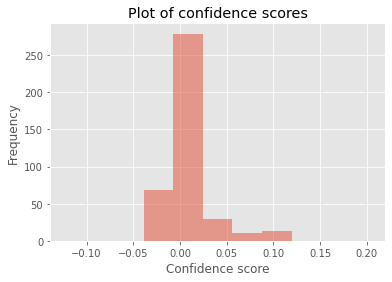

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.1, max(confidence_m)+0.1])
plt.hist(confidence_m, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

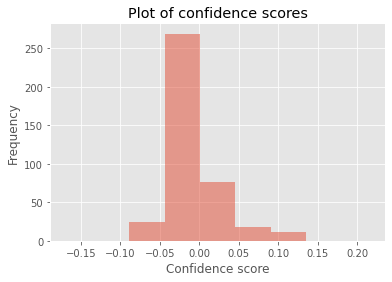

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.1, max(confidence_f)+0.1])
plt.hist(confidence_f, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Across all samples
#-0.8434138564014332
#-1.0710358969443534
print(avg_m)
print(avg_f)

3.360608645468115
-2.585731808851752


## JOY

In [ ]:
print(avg_f)
print(avg_m)

-2.585731808851752
3.360608645468115


In [ ]:
print(confidence_m)
print(confidence_f)

[0.0495601214916924, -0.00039970193889704044, -0.00048184032850657956, 0.03879517965151336, 0.05002754931311305, 0.006805115324520077, -0.003214056385851511, -0.0032533154265462897, -0.00036622120489936214, 0.012424757709664964, 0.02944019240363667, 0.0013466468938708029, 0.0012276285918433661, 0.015763844437446498, 0.030054759639097907, 0.03077348719987774, -0.0019303112082185432, -0.0020643918150696073, 0.016579426185978345, 0.015118515407816823, 0.007191260345147304, -0.008365997184750505, -0.008156850380627911, -0.001556363477304515, 0.008568946301478819, 0.086034874908497, 0.018005750238330773, 0.01675830225642551, 0.11935522972020235, 0.08336445334347979, 0.01261054021614834, 0.0006912830439208459, 0.0006863278369959762, 0.027122937883784917, 0.021534159461662997, 0.042759103662579144, -0.0015576375593301082, -0.001853452632331987, 0.03139370314169108, 0.029743582080473834, 0.10105765518216492, 0.014571753925560408, 0.014040506871077498, 0.11419417013770151, 0.07175499605611298, 

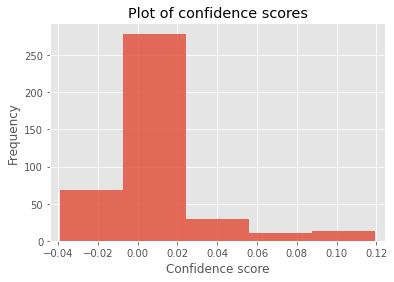

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.005, max(confidence_m)+0.005])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

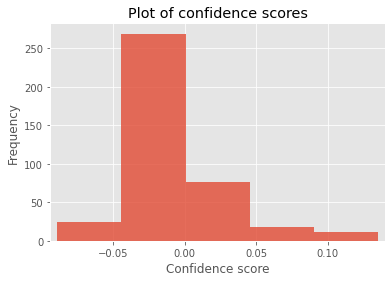

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.005, max(confidence_f)+0.005])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## SAD

In [ ]:
print(avg_f)
print(avg_m)

-2.585731808851752
3.360608645468115


In [ ]:
print(confidence_m)
print(confidence_f)

[0.0495601214916924, -0.00039970193889704044, -0.00048184032850657956, 0.03879517965151336, 0.05002754931311305, 0.006805115324520077, -0.003214056385851511, -0.0032533154265462897, -0.00036622120489936214, 0.012424757709664964, 0.02944019240363667, 0.0013466468938708029, 0.0012276285918433661, 0.015763844437446498, 0.030054759639097907, 0.03077348719987774, -0.0019303112082185432, -0.0020643918150696073, 0.016579426185978345, 0.015118515407816823, 0.007191260345147304, -0.008365997184750505, -0.008156850380627911, -0.001556363477304515, 0.008568946301478819, 0.086034874908497, 0.018005750238330773, 0.01675830225642551, 0.11935522972020235, 0.08336445334347979, 0.01261054021614834, 0.0006912830439208459, 0.0006863278369959762, 0.027122937883784917, 0.021534159461662997, 0.042759103662579144, -0.0015576375593301082, -0.001853452632331987, 0.03139370314169108, 0.029743582080473834, 0.10105765518216492, 0.014571753925560408, 0.014040506871077498, 0.11419417013770151, 0.07175499605611298, 

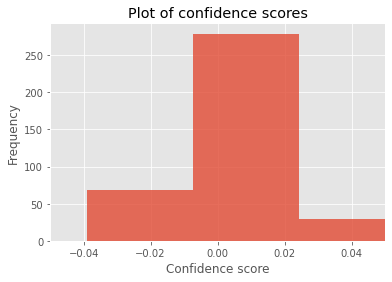

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([-0.05, 0.05])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

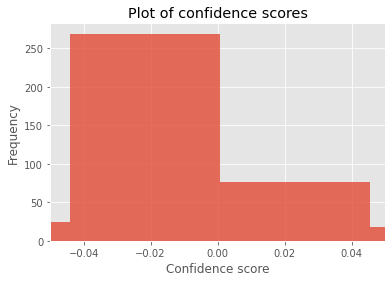

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([-0.05, 0.05])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## FEAR

In [ ]:
print(avg_f)
print(avg_m)

-2.585731808851752
3.360608645468115


In [ ]:
print(confidence_m)
print(confidence_f)

[0.0495601214916924, -0.00039970193889704044, -0.00048184032850657956, 0.03879517965151336, 0.05002754931311305, 0.006805115324520077, -0.003214056385851511, -0.0032533154265462897, -0.00036622120489936214, 0.012424757709664964, 0.02944019240363667, 0.0013466468938708029, 0.0012276285918433661, 0.015763844437446498, 0.030054759639097907, 0.03077348719987774, -0.0019303112082185432, -0.0020643918150696073, 0.016579426185978345, 0.015118515407816823, 0.007191260345147304, -0.008365997184750505, -0.008156850380627911, -0.001556363477304515, 0.008568946301478819, 0.086034874908497, 0.018005750238330773, 0.01675830225642551, 0.11935522972020235, 0.08336445334347979, 0.01261054021614834, 0.0006912830439208459, 0.0006863278369959762, 0.027122937883784917, 0.021534159461662997, 0.042759103662579144, -0.0015576375593301082, -0.001853452632331987, 0.03139370314169108, 0.029743582080473834, 0.10105765518216492, 0.014571753925560408, 0.014040506871077498, 0.11419417013770151, 0.07175499605611298, 

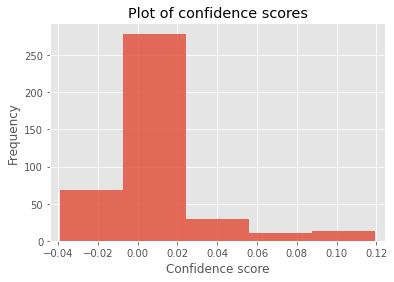

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.005, max(confidence_m)+0.005])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

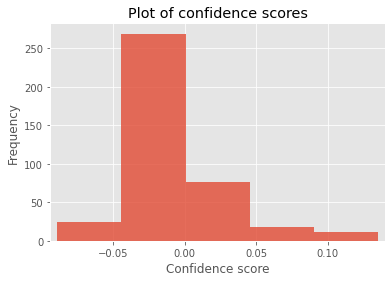

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.005, max(confidence_f)+0.005])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## Anger

In [ ]:
print(avg_f)
print(avg_m)

-2.585731808851752
3.360608645468115


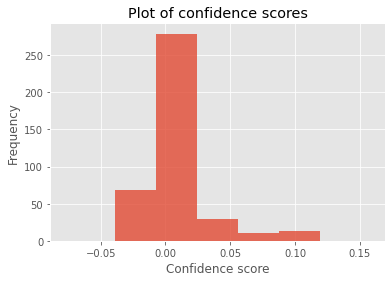

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.05, max(confidence_m)+0.05])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

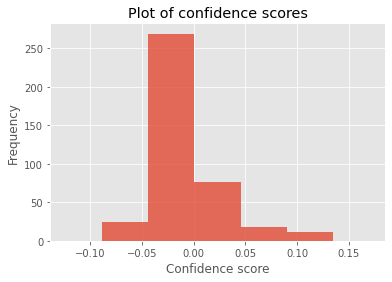

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.05, max(confidence_f)+0.05])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

# Explanation with EEC (SVM_BOW without SGD)

In [ ]:
class_names = ['negative','neutral', 'positive']
explainer = LimeTextExplainer(class_names=class_names)

avg_f=0
avg_m=0
confidence_m=[]
confidence_f=[]
for i in range(len(m)):
  exp = explainer.explain_instance(tokenize_(m[i]), svc_bow_pipe.decision_function, top_labels=3, num_features=10, num_samples=100)
  # print(exp.as_list())
  for item in exp.as_list():
    if(str(item[0]).lower() in masculine):
      avg_m+=float(item[1])
      confidence_m.append(float(item[1]))
print()
print()
for i in range(len(fe)):
  exp = explainer.explain_instance(tokenize_(fe[i]), svc_bow_pipe.decision_function, top_labels=3, num_features=10, num_samples=100)
  # print(exp.as_list())
  for item in exp.as_list():
    if(str(item[0]).lower() in feminine):
      avg_f+=float(item[1])
      confidence_f.append(float(item[1]))

In [ ]:
exp = explainer.explain_instance(tokenize_(m[6]), svc_bow_pipe.decision_function, num_features=10, num_samples=20)
print(exp.as_list())

[('depressed', 0.02592841195460394), ('man', -0.023277955777827247), ('feels', 0.022876809846109285), ('this', 0.0021728841278524018)]


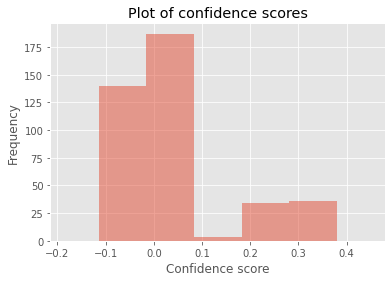

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.1, max(confidence_m)+0.1])
plt.hist(confidence_m, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

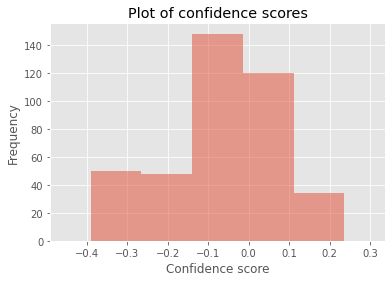

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.1, max(confidence_f)+0.1])
plt.hist(confidence_f, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Across all samples
#-0.8434138564014332
#-1.0710358969443534
print(avg_m)
print(avg_f)

16.532040599484397
-30.94631145202025


## JOY

In [ ]:
print(avg_f)
print(avg_m)

-30.94631145202025
16.532040599484397


In [ ]:
print(confidence_m)
print(confidence_f)

[0.056526636063246295, -0.005927720808704787, -0.01128594481263588, 0.13435335513726426, 0.14361872716062857, -0.00025290644532453214, -0.03214966237196156, -0.028420791267956283, -0.02538642569952864, 0.06839963065800159, 0.02955435102416383, 0.01249760427698763, 0.01036870739967982, 0.057600456363195676, 0.106221711791396, -0.024542194186470783, -0.05551371992128417, -0.05774135741554097, -0.011414349289177226, -0.006449055553364361, -0.033097913649063, -0.07282836111851895, -0.0788011297436425, -0.041484298322344654, -0.013351308398940972, 0.35651526257329424, 0.32342643941484295, 0.31927364138456316, 0.37247073871362385, 0.3478035364620541, 0.06176760432169473, 0.0032677765007488695, -0.001687312685730496, 0.016153335263573033, 0.03278400871342529, 0.054334050505753635, 0.012895165884144029, 0.004783878996221345, 0.035259918816099176, 0.07227812151305348, 0.30667586158032156, 0.23780690869205695, 0.22879641711388438, 0.26234626197435124, 0.29705516764745743, 0.02110477577736479, -0

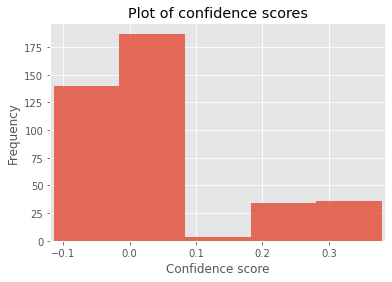

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.005, max(confidence_m)+0.005])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

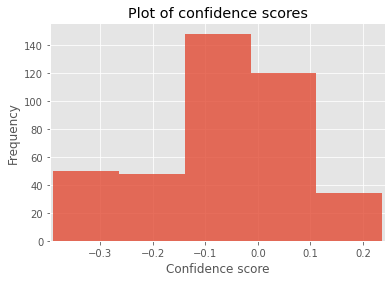

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.005, max(confidence_f)+0.005])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## SAD

In [ ]:
print(avg_f)
print(avg_m)

-30.94631145202025
16.532040599484397


In [ ]:
print(confidence_m)
print(confidence_f)

[0.056526636063246295, -0.005927720808704787, -0.01128594481263588, 0.13435335513726426, 0.14361872716062857, -0.00025290644532453214, -0.03214966237196156, -0.028420791267956283, -0.02538642569952864, 0.06839963065800159, 0.02955435102416383, 0.01249760427698763, 0.01036870739967982, 0.057600456363195676, 0.106221711791396, -0.024542194186470783, -0.05551371992128417, -0.05774135741554097, -0.011414349289177226, -0.006449055553364361, -0.033097913649063, -0.07282836111851895, -0.0788011297436425, -0.041484298322344654, -0.013351308398940972, 0.35651526257329424, 0.32342643941484295, 0.31927364138456316, 0.37247073871362385, 0.3478035364620541, 0.06176760432169473, 0.0032677765007488695, -0.001687312685730496, 0.016153335263573033, 0.03278400871342529, 0.054334050505753635, 0.012895165884144029, 0.004783878996221345, 0.035259918816099176, 0.07227812151305348, 0.30667586158032156, 0.23780690869205695, 0.22879641711388438, 0.26234626197435124, 0.29705516764745743, 0.02110477577736479, -0

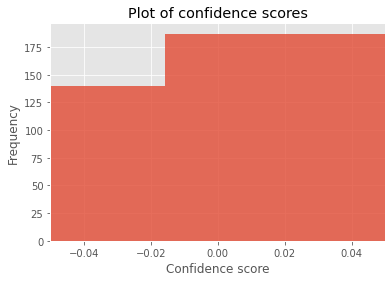

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([-0.05, 0.05])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

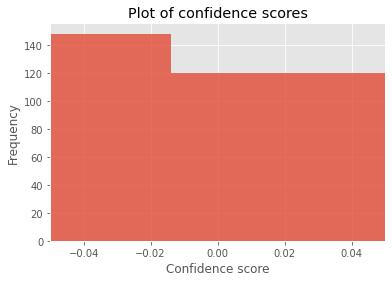

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([-0.05, 0.05])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## FEAR

In [ ]:
print(avg_f)
print(avg_m)

-30.94631145202025
16.532040599484397


In [ ]:
print(confidence_m)
print(confidence_f)

[0.056526636063246295, -0.005927720808704787, -0.01128594481263588, 0.13435335513726426, 0.14361872716062857, -0.00025290644532453214, -0.03214966237196156, -0.028420791267956283, -0.02538642569952864, 0.06839963065800159, 0.02955435102416383, 0.01249760427698763, 0.01036870739967982, 0.057600456363195676, 0.106221711791396, -0.024542194186470783, -0.05551371992128417, -0.05774135741554097, -0.011414349289177226, -0.006449055553364361, -0.033097913649063, -0.07282836111851895, -0.0788011297436425, -0.041484298322344654, -0.013351308398940972, 0.35651526257329424, 0.32342643941484295, 0.31927364138456316, 0.37247073871362385, 0.3478035364620541, 0.06176760432169473, 0.0032677765007488695, -0.001687312685730496, 0.016153335263573033, 0.03278400871342529, 0.054334050505753635, 0.012895165884144029, 0.004783878996221345, 0.035259918816099176, 0.07227812151305348, 0.30667586158032156, 0.23780690869205695, 0.22879641711388438, 0.26234626197435124, 0.29705516764745743, 0.02110477577736479, -0

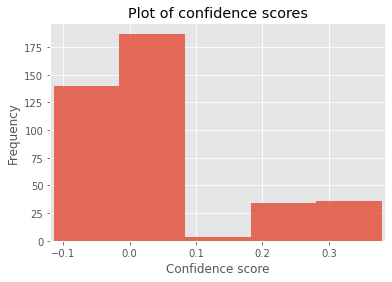

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.005, max(confidence_m)+0.005])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

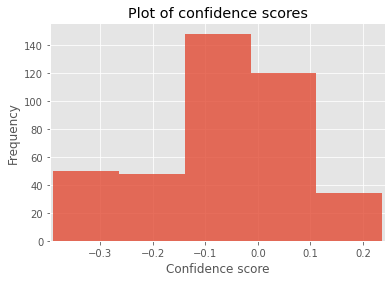

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.005, max(confidence_f)+0.005])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

## ANGER

In [ ]:
print(avg_f)
print(avg_m)

-30.94631145202025
16.532040599484397


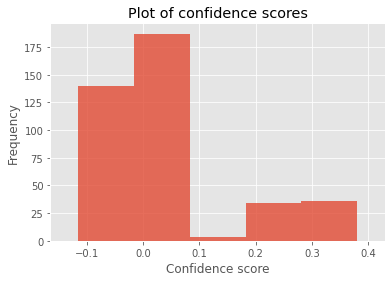

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.05, max(confidence_m)+0.05])
plt.hist(confidence_m, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

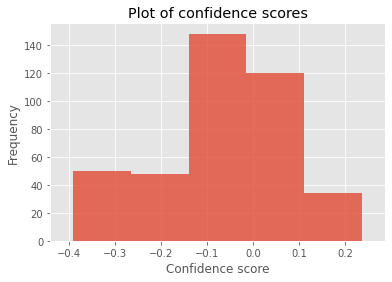

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.05, max(confidence_f)+0.05])
plt.hist(confidence_f, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()